<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Data-Load" data-toc-modified-id="Data-Load-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Data Load</a></span></li><li><span><a href="#Input-x-Backpropagation" data-toc-modified-id="Input-x-Backpropagation-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Input x Backpropagation</a></span></li><li><span><a href="#Visualization" data-toc-modified-id="Visualization-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Visualization</a></span><ul class="toc-item"><li><span><a href="#MNIST" data-toc-modified-id="MNIST-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>MNIST</a></span></li><li><span><a href="#CIFAR10" data-toc-modified-id="CIFAR10-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>CIFAR10</a></span></li></ul></li></ul></div>

In [1]:
import torch

import numpy as np
import sys

import matplotlib.pyplot as plt

sys.path.append('../code')
from utils import get_samples
from saliency.attribution_methods import VanillaBackprop
from saliency.ensembles import *

# Data Load

In [2]:
original_images_mnist, original_targets_mnist, pre_images_mnist, mnist_classes, mnist_model = get_samples('mnist')

Data Complete
Model Complete


In [3]:
original_images_cifar10, original_targets_cifar10, pre_images_cifar10, cifar10_classes, cifar10_model = get_samples('cifar10')

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Data Complete
Model Complete


# Input x Backpropagation

In [4]:
mnist_VBP = VanillaBackprop(mnist_model)
cifar10_VBP = VanillaBackprop(cifar10_model)

# Visualization

In [5]:
def visualize_results(origin_imgs, results, probs, preds, classes, names, target, **kwargs):
    # initialize
    row = kwargs['row']
    col = kwargs['col']
    size = kwargs['size']
    fontsize = kwargs['fontsize']
    labelsize = kwargs['labelsize']
    
    if target=='mnist':
        origin_imgs= origin_imgs.squeeze()
        for i in range(len(results)):
            results[i] = results[i].squeeze()
        color = 'gray'
    else:
        color = None
            
    
    f, ax = plt.subplots(row, col, figsize=size)
    # original images
    for i in range(row):
        ax[i,0].imshow(origin_imgs[i], color)
        ax[i,0].set_ylabel('True: {0:}\nPred: {1:} ({2:.2%})'.format(mnist_classes[i], int(preds[i]), probs[i]), size=labelsize)
        ax[i,0].set_xticks([])
        ax[i,0].set_yticks([])
        # set title
        if i == 0:
            ax[i,0].set_title('Original Image', size=fontsize)

    for i in range(row*(col-1)):
        r = i//(col-1)
        c = i%(col-1)
        ax[r,c+1].imshow(results[c][r].squeeze(), color)
        ax[r,c+1].axis('off')
        # set title
        if r == 0:
            ax[r,c+1].set_title(names[c], size=fontsize)

    plt.subplots_adjust(wspace=-0.5, hspace=0)
    plt.tight_layout()

## MNIST

In [6]:
# vanilla gradients
outputs, probs, preds = mnist_VBP.generate_image(pre_images_mnist, original_targets_mnist)

# ensemble
n = 50
sigma = 2
# vanilla gradients + smooth grad
outputs_SG, _, _ = generate_smooth_grad(pre_images_mnist, original_targets_mnist, n, sigma, mnist_VBP)
# vanilla gradients + smooth square grad
outputs_SG_SQ, _, _ = generate_smooth_square_grad(pre_images_mnist, original_targets_mnist, n, sigma, mnist_VBP)
# vanilla gradients + smooth var grad
outputs_SG_VAR, _, _ = generate_smooth_var_grad(pre_images_mnist, original_targets_mnist, n, sigma, mnist_VBP)

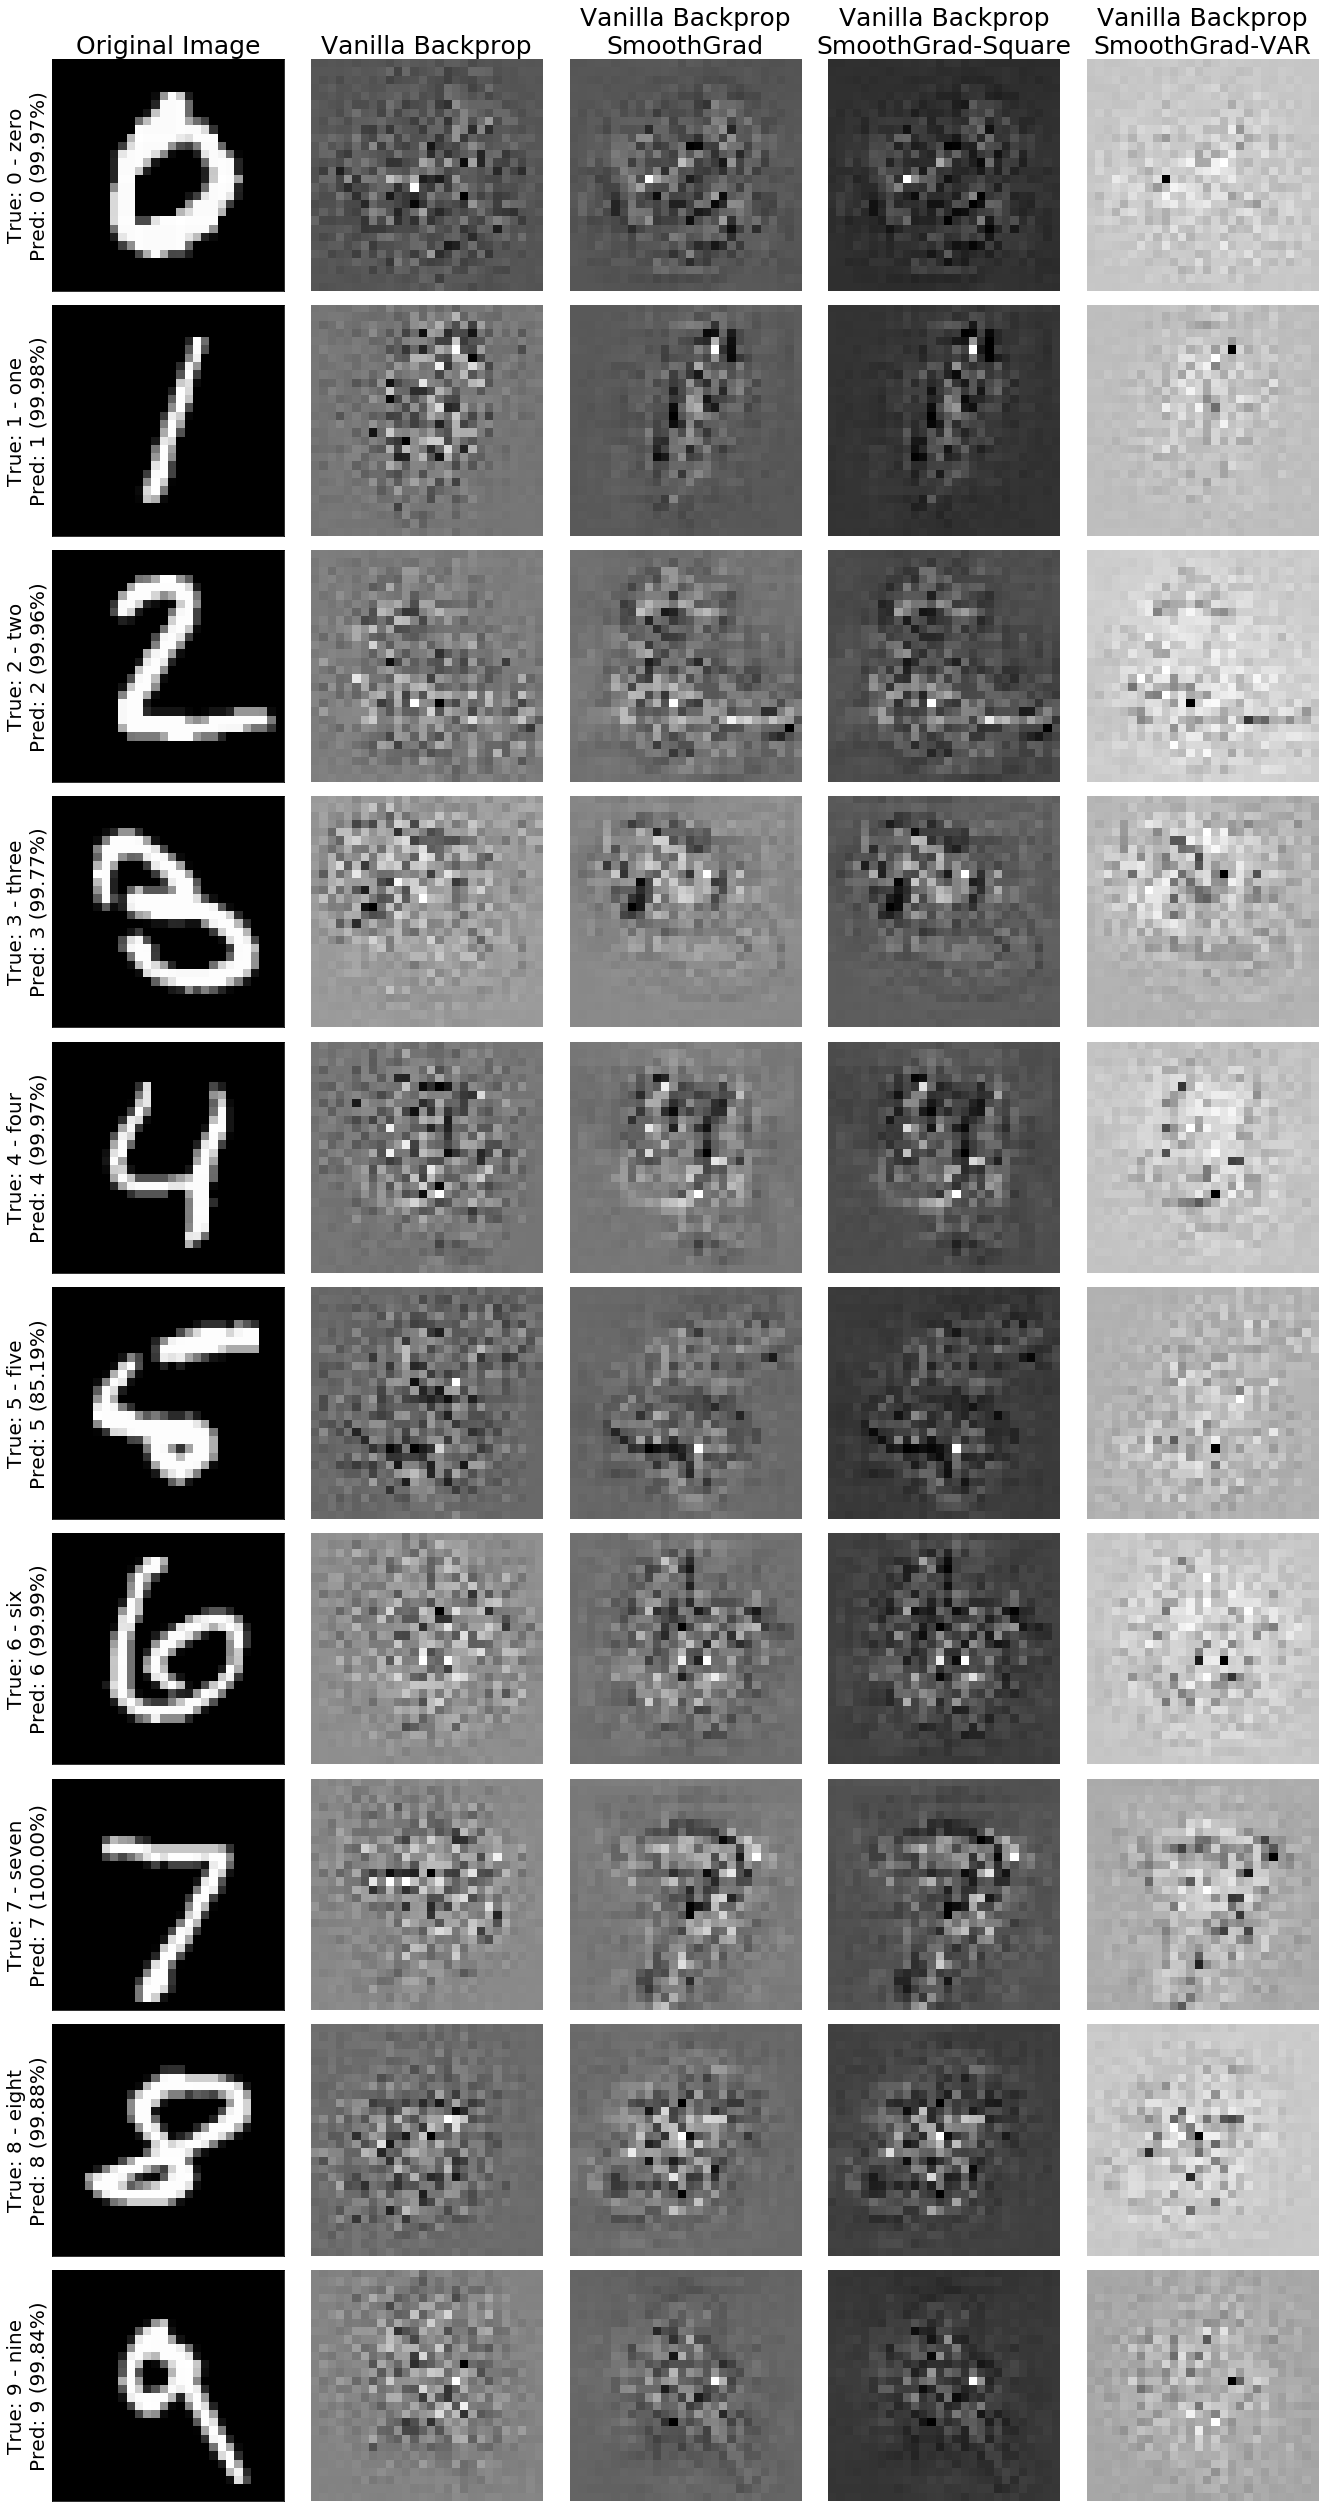

In [7]:
names = ['Vanilla Backprop',
         'Vanilla Backprop\nSmoothGrad','Vanilla Backprop\nSmoothGrad-Square','Vanilla Backprop\nSmoothGrad-VAR'] # names
results = [outputs, outputs_SG, outputs_SG_SQ, outputs_SG_VAR]
target = 'mnist'

visualize_results(original_images_mnist,
                  results,
                  probs,
                  preds,
                  mnist_classes,
                  names,
                  target,
                  col=5, row=10, size=(20,35), labelsize=20, fontsize=25)

## CIFAR10

In [8]:
# vanilla gradients
outputs, probs, preds = cifar10_VBP.generate_image(pre_images_cifar10, original_targets_cifar10)

# ensemble
n = 50
sigma = 2
# vanilla gradients + smooth grad
outputs_SG, _, _ = generate_smooth_grad(pre_images_cifar10, original_targets_cifar10, n, sigma, cifar10_VBP)
# vanilla gradients + smooth square grad
outputs_SG_SQ, _, _ = generate_smooth_square_grad(pre_images_cifar10, original_targets_cifar10, n, sigma, cifar10_VBP)
# vanilla gradients + smooth var grad
outputs_SG_VAR, _, _ = generate_smooth_var_grad(pre_images_cifar10, original_targets_cifar10, n, sigma, cifar10_VBP)

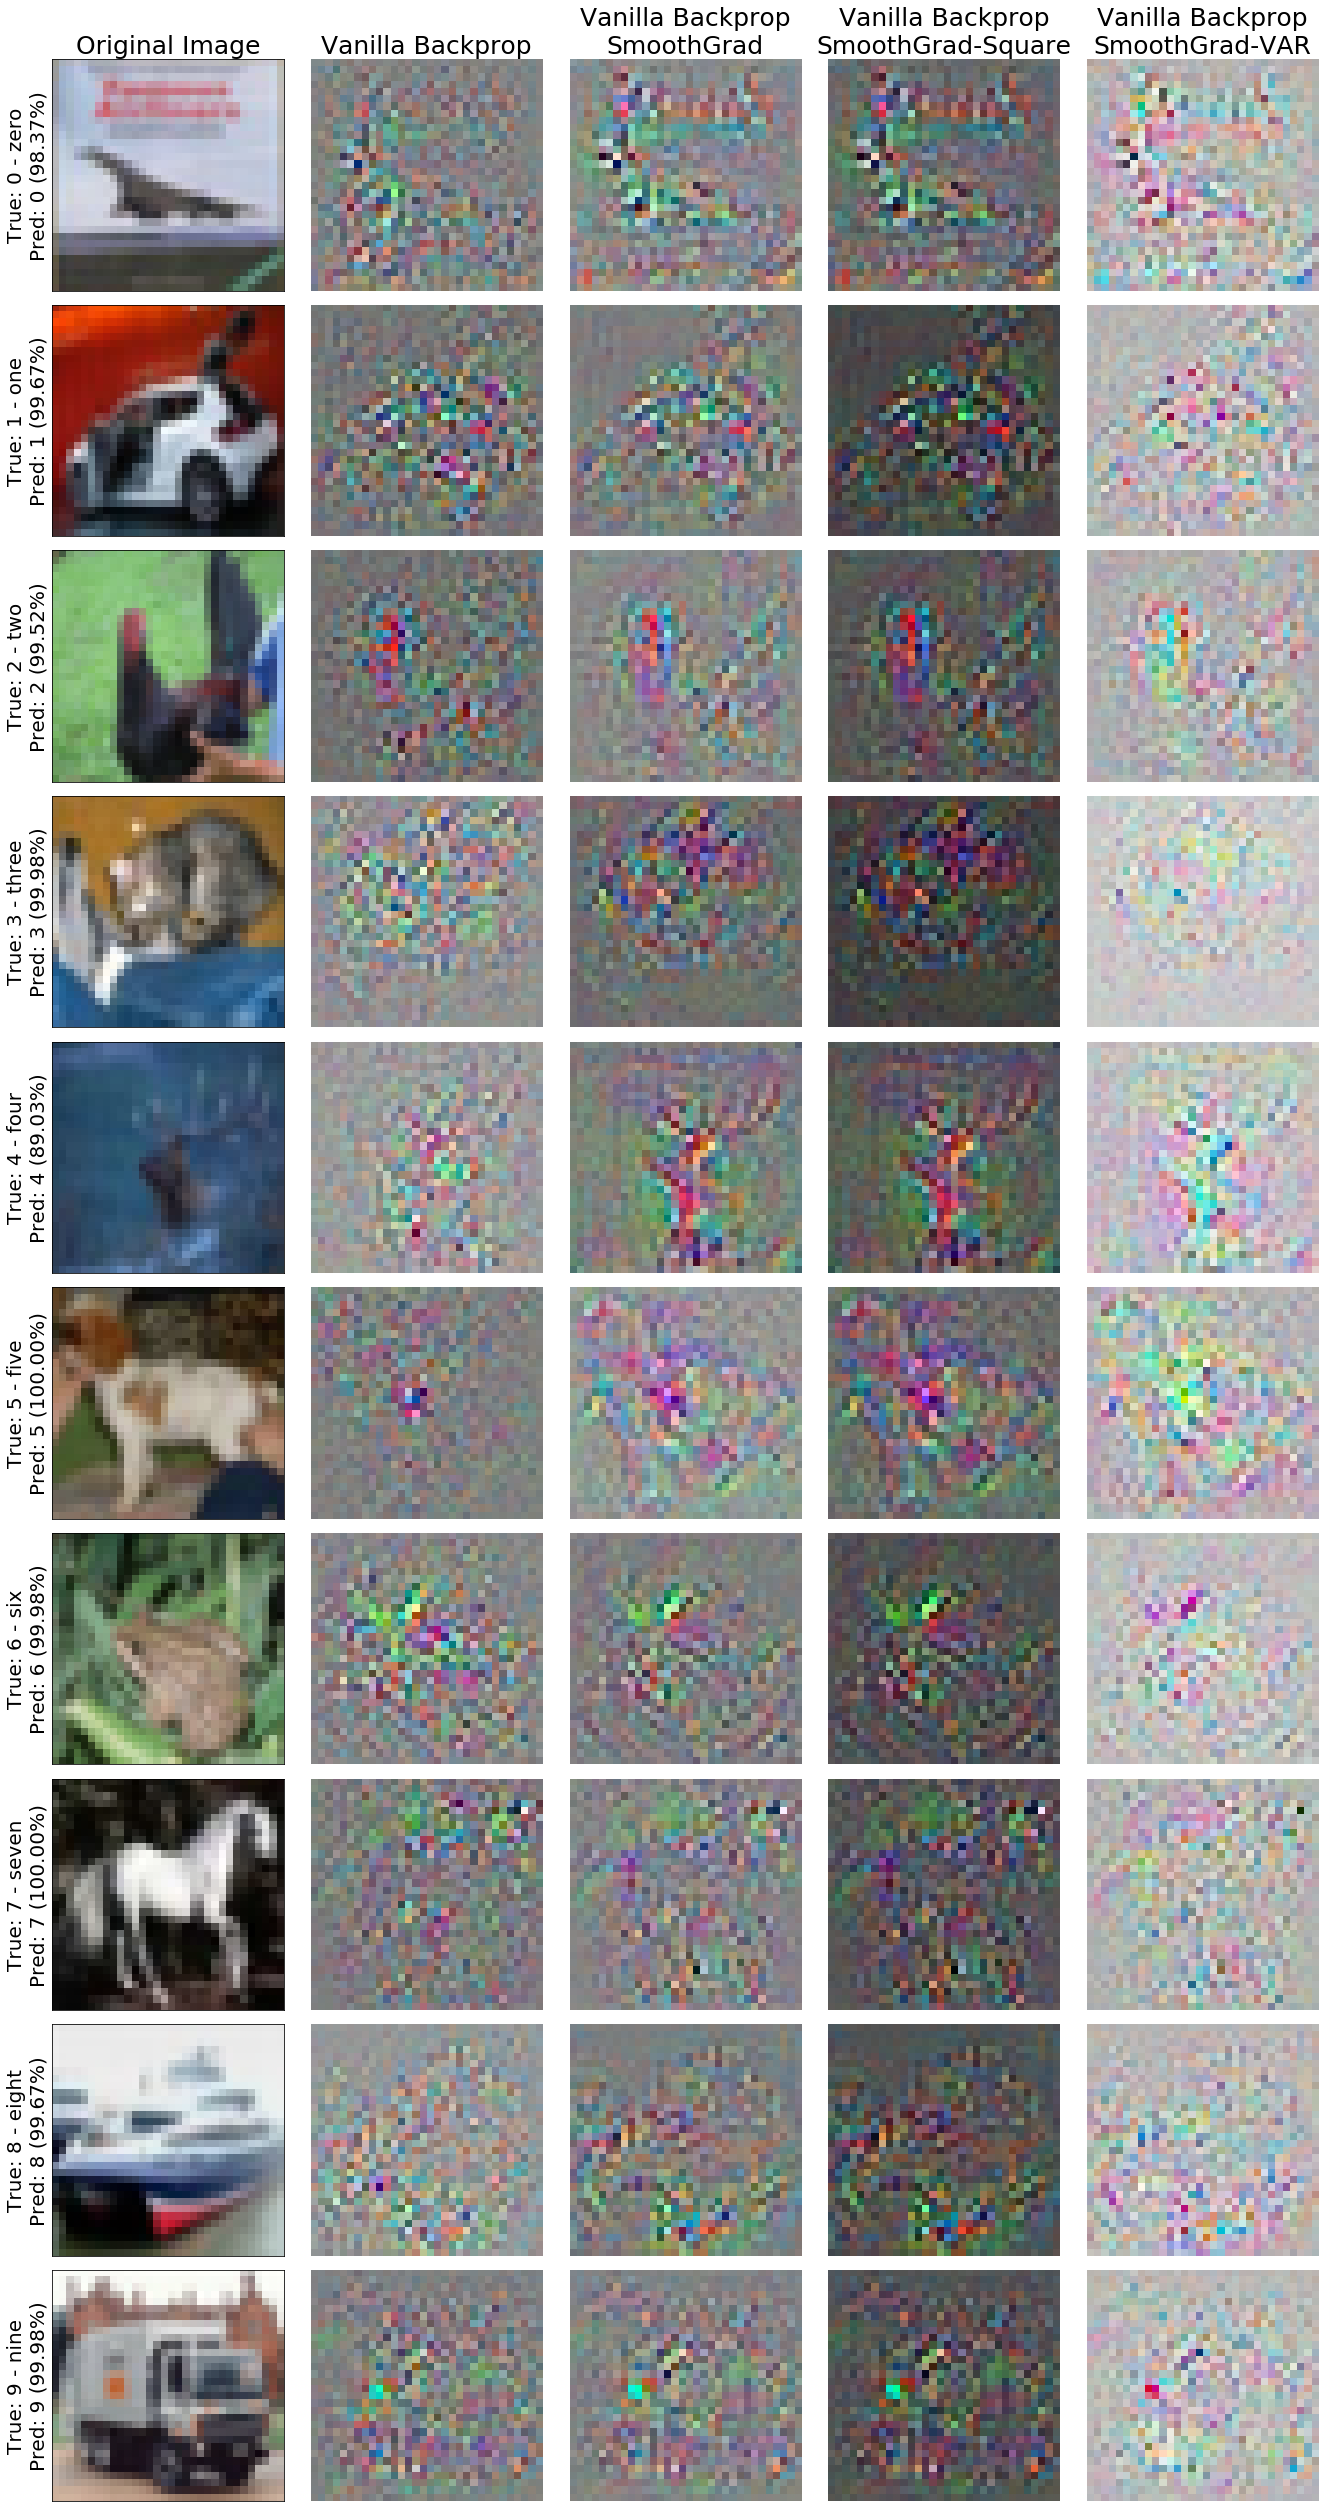

In [9]:
names = ['Vanilla Backprop',
         'Vanilla Backprop\nSmoothGrad','Vanilla Backprop\nSmoothGrad-Square','Vanilla Backprop\nSmoothGrad-VAR'] # names
results = [outputs, outputs_SG, outputs_SG_SQ, outputs_SG_VAR]
target = 'cifar10'

visualize_results(original_images_cifar10,
                  results,
                  probs,
                  preds,
                  cifar10_classes,
                  names,
                  target,
                  col=5, row=10, size=(20,35), labelsize=20, fontsize=25)